<a href="https://colab.research.google.com/github/Karantiwari307/Airbnb-Exploratory-Data-Analysis/blob/main/Capstone_Project_Airbnb_Bookings_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Since 2008, guests and hosts have used Airbnb to expand on traveling possibilities and present a more unique, personalized way of experiencing the world. Today, Airbnb became one of a kind service that is used and recognized by the whole world. Data analysis on millions of listings provided through Airbnb is a crucial factor for the company. These millions of listings generate a lot of data - data that can be analyzed and used for security, business decisions, understanding of customers' and providers' (hosts) behavior and performance on the platform, guiding marketing initiatives, implementation of innovative additional services and much more. </b>

## <b>This dataset has around 49,000 observations in it with 16 columns and it is a mix between categorical and numeric values. </b>

## <b> Explore and analyze the data to discover key understandings (not limited to these) such as : 
* What can we learn about different hosts and areas?
* What can we learn from predictions? (ex: locations, prices, reviews, etc)
* Which hosts are the busiest and why?
* Is there any noticeable difference of traffic among different areas and what could be the reason for it? </b>

In [1]:
# importing libraries
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from matplotlib import style 
style.use('fivethirtyeight')
from wordcloud import WordCloud

In [2]:
# MOUNTING THE DRIVE AND IMPORTING DATASET
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# importing file
df_original= pd.read_csv('/content/drive/MyDrive/Almabetter projects/Airbnb NYC 2019 (1).csv')

In [4]:
pd.set_option('display.max_columns', 500)

In [5]:
# creating a copy of the original dataset.
df= df_original.copy()

In [6]:
# overview of dataset
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [ ]:
# shape of dataset
df.shape

(48895, 16)

In [ ]:
# Basic info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [7]:
# changing  object format into datetime format
df["last_review"]=pd.to_datetime(df["last_review"])

**CLEANING THE DATASSET**

In [8]:
# Checking null values
df.isna().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [9]:
# dropping null values from  the dataset
df.dropna(how='any',inplace=True)

In [10]:
# column in datasset
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [11]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
5,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129


In [12]:
# Lets see an overview of the complete dataset.
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,3.882100e+04,3.882100e+04,38821.000000,38821.000000,38821.000000,38821.000000,38821.000000,38821.000000,38821.000000,38821.000000
mean,1.810081e+07,6.424582e+07,40.728129,-73.951149,142.332526,5.869220,29.290255,1.373229,5.166611,114.886299
std,1.069372e+07,7.589752e+07,0.054991,0.046693,196.994756,17.389026,48.182900,1.680328,26.302954,129.529950
min,2.539000e+03,2.438000e+03,40.506410,-74.244420,0.000000,1.000000,1.000000,0.010000,1.000000,0.000000
25%,8.721444e+06,7.029525e+06,40.688640,-73.982460,69.000000,1.000000,3.000000,0.190000,1.000000,0.000000
50%,1.887286e+07,2.837092e+07,40.721710,-73.954810,101.000000,2.000000,9.000000,0.720000,1.000000,55.000000
75%,2.756746e+07,1.018905e+08,40.762990,-73.935020,170.000000,4.000000,33.000000,2.020000,2.000000,229.000000
max,3.645581e+07,2.738417e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


**DATA VISUALISATION**

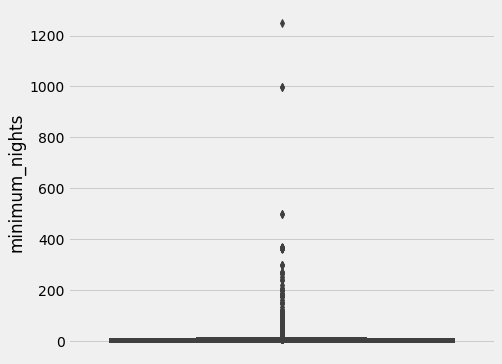

In [13]:
# Visualising boxplot
plt.figure(figsize=(15,6))
plt.subplot(1, 2, 1)
sns.boxplot(y=df['minimum_nights'])
# fig.set_title('')
# fig.set_ylabel(var)
# plt.show()

The maximum value for minimum nights is 1250 which can easily be concluded as an outlier.

In [14]:
# considering 95 percentile as upper limit
upper_lim = df['minimum_nights'].quantile(.95)
upper_lim

30.0

In [15]:
# replacing the valuess which are greater than upper limit to upper limit
df.loc[(df['minimum_nights'] > upper_lim),"minimum_nights"] = upper_lim

In [18]:
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,3.881100e+04,3.881100e+04,38811.000000,38811.000000,38811.000000,38811.000000,38811.000000,38811.000000,38811.000000,38811.000000
mean,1.810018e+07,6.424611e+07,40.728134,-73.951157,142.369199,5.151503,29.288088,1.373135,5.166757,114.881631
std,1.069502e+07,7.590371e+07,0.054992,0.046695,197.006883,7.722752,48.184653,1.680276,26.306326,129.535406
min,2.539000e+03,2.438000e+03,40.506410,-74.244420,10.000000,1.000000,1.000000,0.010000,1.000000,0.000000
25%,8.720894e+06,7.028184e+06,40.688640,-73.982470,69.000000,1.000000,3.000000,0.190000,1.000000,0.000000
50%,1.887173e+07,2.837092e+07,40.721710,-73.954810,101.000000,2.000000,9.000000,0.720000,1.000000,55.000000
75%,2.756998e+07,1.018872e+08,40.762995,-73.935030,170.000000,4.000000,33.000000,2.020000,2.000000,229.000000
max,3.645581e+07,2.738417e+08,40.913060,-73.712990,10000.000000,30.000000,629.000000,58.500000,327.000000,365.000000


In [16]:
# The minimum value of price column is 0. It is clearly a mistake, therefore we'll now look total null values in that column:
(df['price']==0).sum()

10

In [17]:
# removing rows 
df=df.loc[df['price']>0]

In [19]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
5,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129


In [20]:
# shape of dataset
df.shape

(38811, 16)

We have cleaned our dataset ,Now let's go for EDA.

##**EDA**


1. What can we learn about different hosts and areas?

In [ ]:
# Lets see which neighbourhood has the maximum airbnbs
x=df['neighbourhood_group'].value_counts().reset_index()
print(x)

           index  neighbourhood_group
0      Manhattan                16621
1       Brooklyn                16430
2         Queens                 4572
3          Bronx                  874
4  Staten Island                  314


Manhattan and Brooklyn has the most number of airbnbs.

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


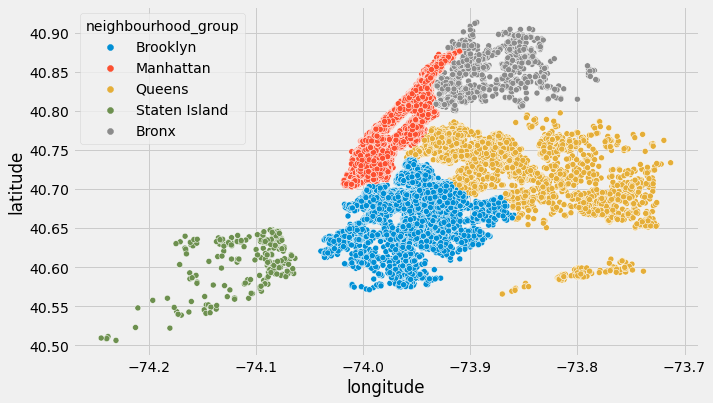

In [ ]:
# plotting neighbourood groups on map
plt.figure(figsize=(10,6))
sns.scatterplot(df.longitude,df.latitude,hue=df.neighbourhood_group)
plt.ioff()

Lets see which host has the most number of listing

In [ ]:
# Top hosts listed
top_host=df.host_id.value_counts()
top_host_df=pd.DataFrame(top_host)
top_host_df.reset_index(inplace=True)
top_host_df.rename(columns={'index':'Host_ID', 'host_id':'Count'}, inplace=True)
top_host_df


,Host_ID,Count
0,219517861,207
1,61391963,79
2,16098958,61
3,137358866,51
4,7503643,49
...,...,...
30227,6389984,1
30228,68684053,1
30229,60077920,1
30230,9997184,1


Text(0.5, 0, 'Host IDs')

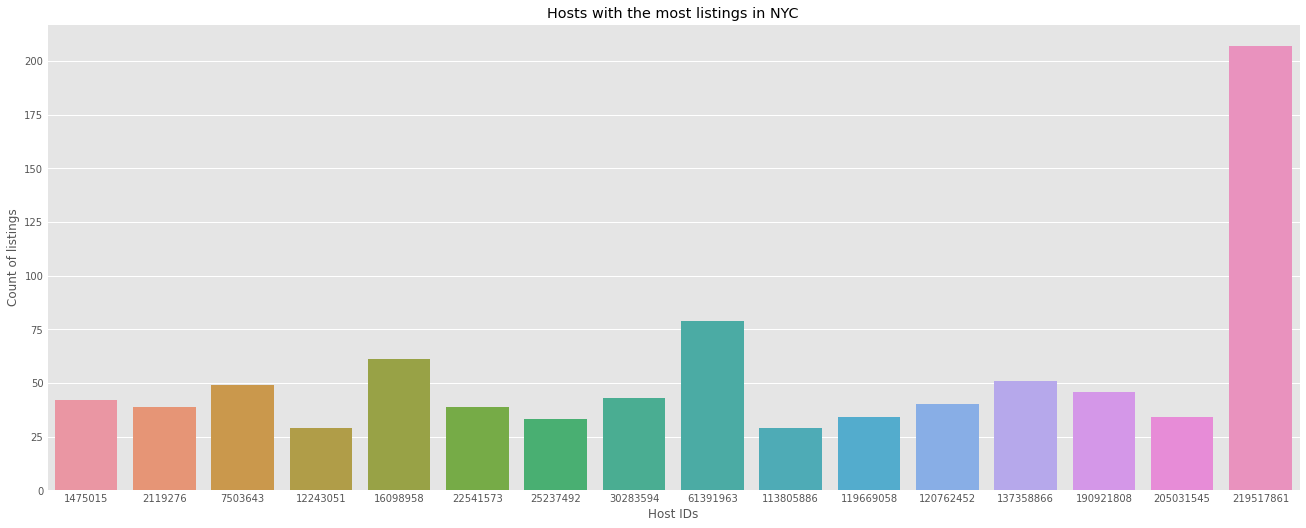

In [ ]:
plt.figure(figsize=(20,8))
viz_1=sns.barplot(x="Host_ID", y="Count", data=top_host_df)
viz_1.set_title('Hosts with the most listings in NYC')
viz_1.set_ylabel('Count of listings')
viz_1.set_xlabel('Host IDs')


219517861 is the host _id which  has the most number of listing

Lets see the price of different room type in different neighbourhoods

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


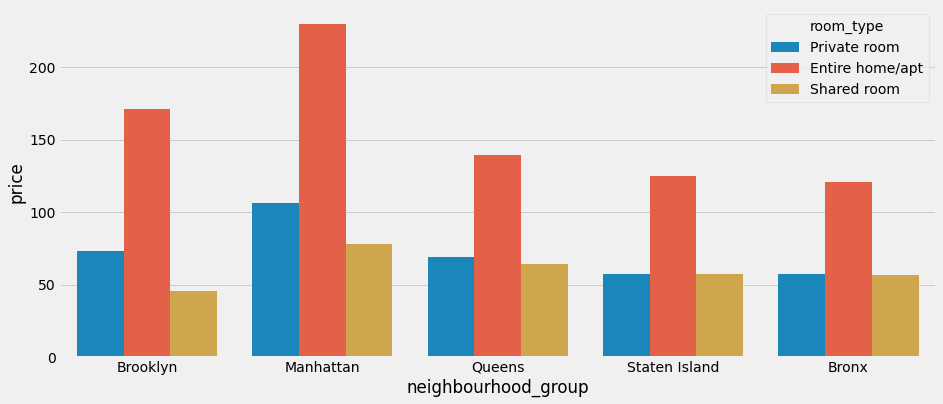

In [ ]:
#using barplot to showcase price of different neighbourhood groups with respect to room types
plt.figure(figsize=(14, 6))
sns.barplot(df.neighbourhood_group, df.price, hue=df.room_type, ci=None)

Manhattan has very expensive rooms and Staten island and Bronx have cheaper rooms.

In [ ]:
# Let's see the top 5 popular price range
popular_price= df.groupby(['price'])['number_of_reviews'].max().reset_index().sort_values(by=["number_of_reviews"],ascending=False)[0:5]
popular_price


,price,number_of_reviews
35,47,629
37,49,607
34,46,543
87,99,540
36,48,510


Text(0.5, 0, 'price in $')

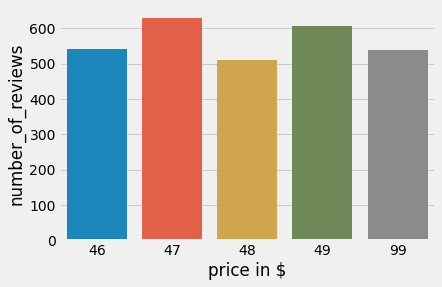

In [ ]:
# visualization
sns.barplot(data=df, x=popular_price["price"], y=popular_price["number_of_reviews"])
plt.xlabel("price in $")

most popular price are between 45 to 100$ 

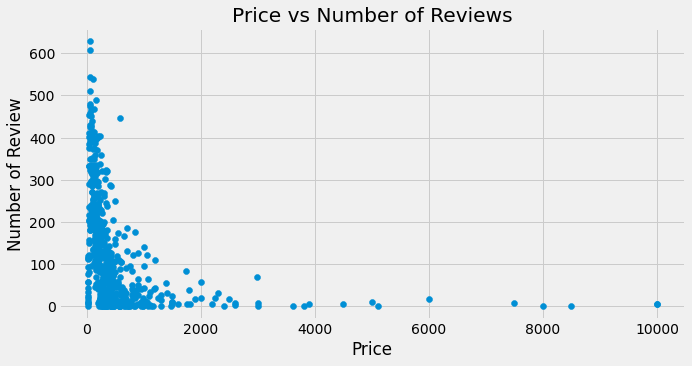

In [ ]:
# most frequently booked price range
max_review=df.groupby(['price'])['number_of_reviews'].max().reset_index()
x= max_review['price']
y = max_review['number_of_reviews']

fig = plt.figure(figsize = (10, 5))
 
# creating  scatter plot
plt.scatter(x, y)
 
plt.xlabel("Price")
plt.ylabel("Number of Review")
plt.title("Price vs Number of Reviews")
plt.show()

:Airbnbs with price less than 1000$ have frequently been booked.There is only one booking in the most expensive aibnb. We can conclude people prefer cheaper and affordable stays

Finding the mean prices of different neighbourhoods through the year

In [21]:
# mean prices of different neighbourhoods through the year
grouped_by_city = df[['price', 'neighbourhood_group']].groupby(['neighbourhood_group']).agg(['mean', 'count'])
grouped_by_city

price       
                           mean  count
neighbourhood_group                   
Bronx                 79.649886    874
Brooklyn             121.529823  16430
Manhattan            180.071596  16621
Queens                95.783683   4572
Staten Island         89.964968    314

In [22]:
#extracting year and month from last_review
df["year"]=df["last_review"].dt.year
df["month"]=df["last_review"].dt.month_name()

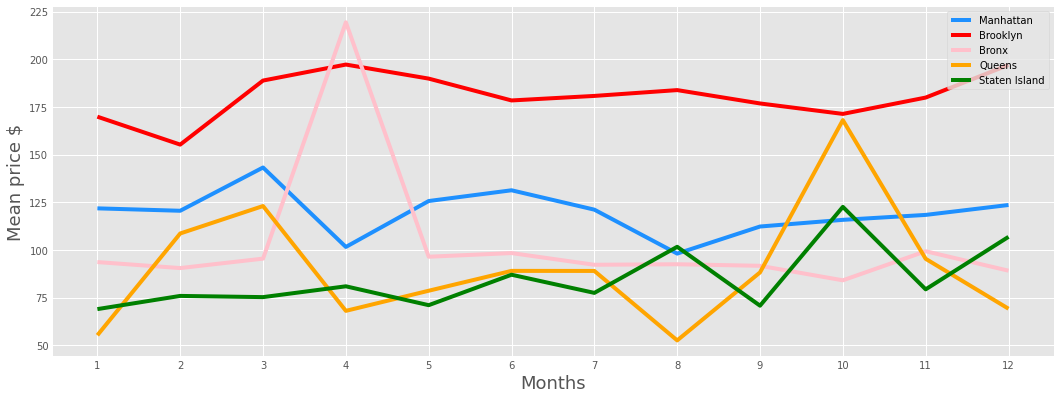

In [23]:
# plot showing monthly mean prices of each neighbourhood
def time_series_1(df):
    style.use('ggplot')
    plt.figure(figsize=(16,6))
    x_labels = [x for x in range(1,13)]
    colors = ['dodgerblue','red','pink','orange','green']
    for i  in range(len(df['neighbourhood_group'].unique())):
        temp_df = df[df['neighbourhood_group']==df['neighbourhood_group'].unique()[i]]
        temp_df2 = temp_df.groupby(['month']).mean()
        plt.plot(temp_df2.index,temp_df2['price'],color=colors[i])
    plt.xticks(temp_df2.index,x_labels)
    plt.xlabel('Months',fontsize=18)
    plt.ylabel('Mean price $',fontsize=18)
    plt.legend(['Manhattan', 'Brooklyn', 'Bronx', 'Queens', 'Staten Island'],loc='upper right')
    plt.show()
time_series_1(df)

Bronx experiences a surge in price in the month of April. Brooklyn maintains a high price throughout the year although prices in August are bit cheap. Queens is expensive in the month of October.

In [24]:
# Busiest month for airbnbs
df['month'].value_counts()

June         13581
July          5933
May           4698
January       2764
April         2109
December      1769
August        1663
October       1544
September     1535
March         1288
November      1157
February       770
Name: month, dtype: int64

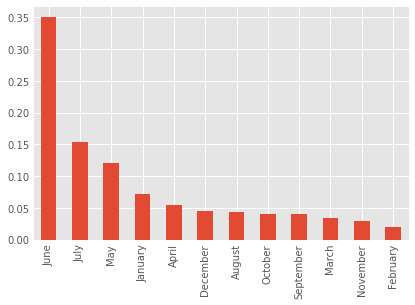

In [25]:
# visualization# 
df['month'].value_counts(normalize= True).plot(kind='bar')

June and July are the busiest months. 35% of the bookings are done in June and 15% bookings are done in July. This can be because most people travel in their summer vacations

3. Which hosts are the busiest and why?


In [ ]:
# grouping by number of reviews
busiest_hosts = df.groupby(['host_name','host_id','room_type','price'])['number_of_reviews'].max().reset_index()
busiest_hosts = busiest_hosts.sort_values(by='number_of_reviews', ascending=False).head(11)
busiest_hosts

,host_name,host_id,room_type,price,number_of_reviews
9383,Dona,47621202,Private room,47,629
16430,Jj,4734398,Private room,49,607
23759,Maya,37312959,Private room,46,543
5765,Carol,2369681,Private room,99,540
8179,Danielle,26432133,Private room,48,510
3650,Asa,12949460,Entire home/apt,160,488
35055,Wanda,792159,Private room,60,480
20953,Linda,2680820,Private room,55,474
7919,Dani,42273,Entire home/apt,120,467
2671,Angela,23591164,Private room,65,466


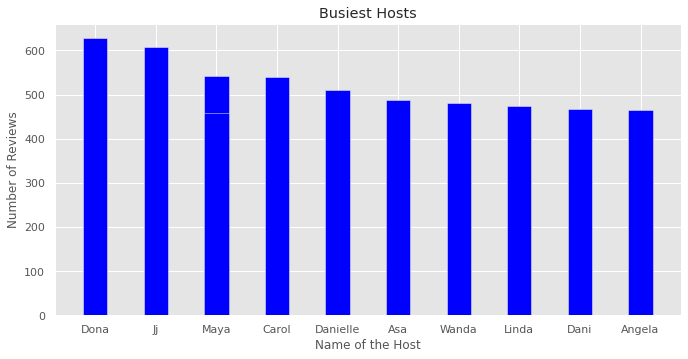

In [ ]:
# plotting the above dataset
name = busiest_hosts['host_name']
reviews = busiest_hosts['number_of_reviews']

fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(name, reviews, color ='blue',
        width = 0.4)
 
plt.xlabel("Name of the Host")
plt.ylabel("Number of Reviews")
plt.title("Busiest Hosts")
plt.show()

This is the list of top 10 buiest hosts. On analyzing the table we can notice some similarities. Private rooms are booked most. Price range is between 45-100 dollars. Therefore we can conclude people prefer private rooms in price range 45-100.

people preference on room type

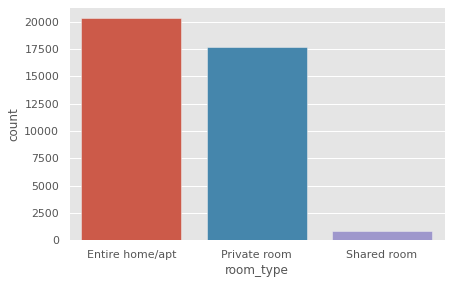

In [ ]:
# visualization of people preference on room type
d=df["room_type"].value_counts().reset_index().rename(columns={"index":"room_type","room_type":"count"})
sns.barplot(data=df, x=d["room_type"], y=d["count"])

Is there any noticeable difference of traffic among different areas and what could be the reason for it?

In [ ]:
# traffic_areas
traffic_areas = df.groupby(['neighbourhood_group','room_type'])['number_of_reviews'].count().reset_index()
traffic_areas = traffic_areas.sort_values(by='number_of_reviews', ascending=False)
traffic_areas

,neighbourhood_group,room_type,number_of_reviews
6,Manhattan,Entire home/apt,9962
3,Brooklyn,Entire home/apt,8158
4,Brooklyn,Private room,7984
7,Manhattan,Private room,6303
10,Queens,Private room,2678
9,Queens,Entire home/apt,1742
1,Bronx,Private room,523
8,Manhattan,Shared room,356
0,Bronx,Entire home/apt,308
5,Brooklyn,Shared room,288


/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


Text(0.5, 1.0, 'Traffic on Neighborhood')

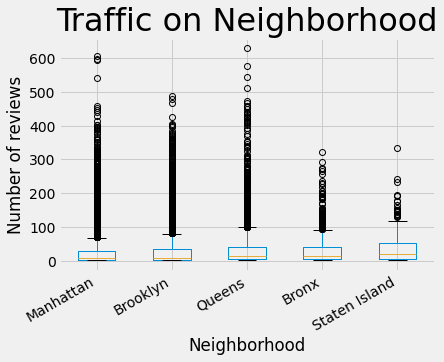

In [ ]:
# plotting the table above
def boxplot_sorted(df, by, column, rot=0):
    df2 = pd.DataFrame({col:vals[column] for col, vals in df.groupby(by)})
    meds = df2.median().sort_values()
    return df2[meds.index].boxplot(rot=rot, return_type="axes")
axes = boxplot_sorted(df, by=["neighbourhood_group"], column="number_of_reviews")
plt.xticks(rotation=30, horizontalalignment='right')
plt.xlabel("Neighborhood")
plt.ylabel("Number of reviews")
plt.title("Traffic on Neighborhood", fontsize= 32)


/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


Text(0.5, 1.0, 'Price By Neighborhood')

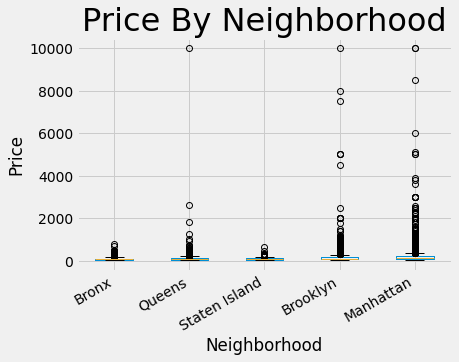

In [ ]:
# Plotting price of each airbnb by neighbourhood
neighboorhood_price = df[['neighbourhood_group', 'price']]
neighboorhood_price = neighboorhood_price.reset_index(drop=True)
def boxplot_sorted(neighbourhood_price, by, column, rot=0):
    df2 = pd.DataFrame({col:vals[column] for col, vals in neighbourhood_price.groupby(by)})
    meds = df2.median().sort_values()
    return df2[meds.index].boxplot(rot=rot, return_type="axes")
axes = boxplot_sorted(neighboorhood_price, by=["neighbourhood_group"], column="price")
plt.xticks(rotation=30, horizontalalignment='right')
plt.xlabel("Neighborhood")
plt.ylabel("Price")
plt.title("Price By Neighborhood", fontsize= 32)

Manhattan and Brooklyn are the busiest neighbourhoods. The prices in these neighbourhoods are also high.

Conclusion:
1. People prefer to stay in cheaper accomodations.
2. If you are looking for cheaper stays then it is recommended to not travel to Bronx in the month of April and Queens in the month of October
3. June and July are the busiest months.
4.  Home apartment and Private rooms are  most preferred  room type
5. Brooklyn and Manhattan experiences highest traffic. This is because they are tourist place. The average price in also Brooklyn and Manhattan are higher as compared to other neighbourhoods.